     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


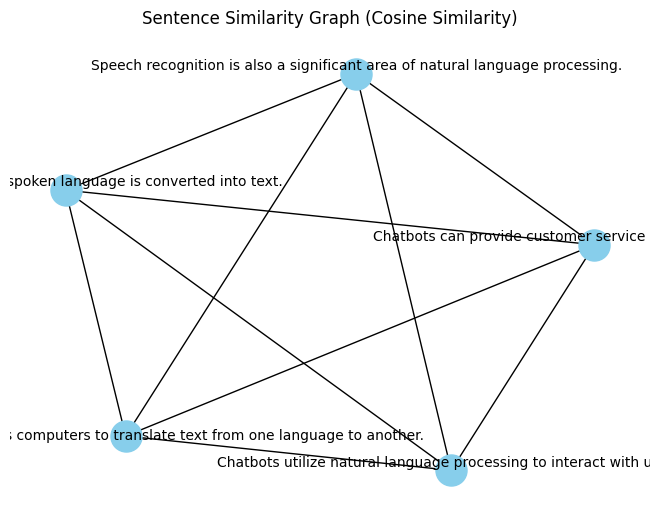

In [13]:
!python -m spacy download en_core_web_md
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_md')
#Input
text = """
Machine translation allows computers to translate text from one language to another.
Speech recognition is also a significant area of natural language processing.
In speech recognition, spoken language is converted into text.
Chatbots utilize natural language processing to interact with users.
Chatbots can provide customer service or information retrieval.
"""
sentences = [sent.text for sent in nlp(text).sents]
# Text Processing
embeddings = [nlp(sentence).vector for sentence in sentences]

similarity_matrix = cosine_similarity(embeddings)

threshold = 0.4
G = nx.Graph()

for i, sentence in enumerate(sentences):
    G.add_node(i, label=sentence)

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        if similarity_matrix[i][j] > threshold:
            G.add_edge(i, j)

#Output
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=500, node_color="skyblue", font_size=10, font_color="black")
plt.title("Sentence Similarity Graph (Cosine Similarity)")
plt.show()


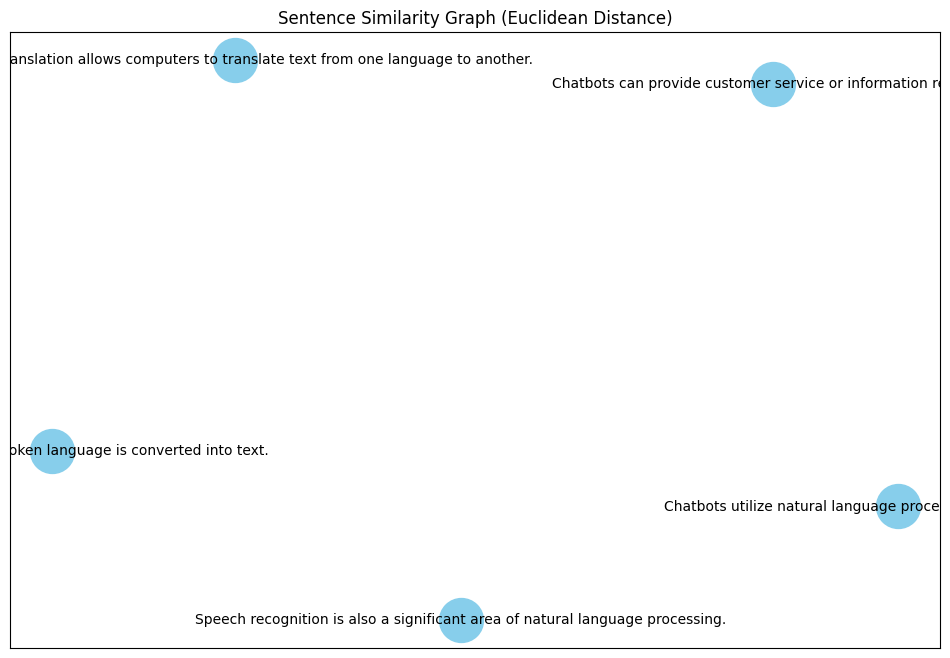

In [17]:
import spacy
import numpy as np
from scipy.spatial.distance import euclidean
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_md')

# Input
text = """
Machine translation allows computers to translate text from one language to another.
Speech recognition is also a significant area of natural language processing.
In speech recognition, spoken language is converted into text.
Chatbots utilize natural language processing to interact with users.
Chatbots can provide customer service or information retrieval.
"""
doc = nlp(text)
sentences = [sent.text.strip() for sent in doc.sents]
# Text Processing
embeddings = [nlp(sentence).vector for sentence in sentences]
distance_matrix = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            distance_matrix[i][j] = euclidean(embeddings[i], embeddings[j])

max_distance = np.max(distance_matrix)
similarity_matrix = max_distance - distance_matrix
threshold = max_distance * 0.6
G = nx.Graph()

for i, sentence in enumerate(sentences):
    G.add_node(i, label=sentence)

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        if similarity_matrix[i][j] > threshold:
            G.add_edge(i, j)
# Output
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="skyblue")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10, font_color="black")

plt.title("Sentence Similarity Graph (Euclidean Distance)")
plt.show()